<img src="https://aiisc.ai/defactify/img/factify_logo.png" width=300 align="left">
<center>
<h4>Starting Kit</h4>
<p>Factify is a Multi-Modal Fact Verification dataset released for a shared task as part of the <a href="https://aiisc.ai/defactify/">De-Factify workshop</a> in AAAI-21.</p>
</center>

In [ ]:
import os
import io
import requests
from PIL import Image
import pandas as pd
import zipfile

# Installation


Download the training data from the codalab competition page from the Participate > Files > Public Data
or use the drive library below

In [ ]:
from google_drive_downloader import GoogleDriveDownloader as gdd
gdd.download_file_from_google_drive(file_id='1ig7XEYU1UKDHrHgDYgqiARWvNdswgFEX',
                                    dest_path='/content/public_folder.zip')

In [ ]:
#fill password
pswd="facttaskaaai22"

In [ ]:
with zipfile.ZipFile("public_folder.zip") as file:
  file.extractall(pwd = bytes(pswd, 'utf-8'))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
download_path = "public_folder/"

In [ ]:
train_df = pd.read_csv(download_path + "train.csv", index_col="Id")
train_df.iloc[8]

claim_image       http://pbs.twimg.com/media/EQUzaKiU4AAtKt8.jpg...
claim             Jharkhand: Mahatama Gandhi's statue in Hazarib...
claim_ocr                                                       NaN
document_image    http://pbs.twimg.com/media/EQVjid7UcAIR9rQ.jpg...
document          A life-size statue of the father of the nation...
document_ocr                                                    NaN
Category                                               Support_Text
Name: 9, dtype: object

You can save images as you like, but we provide a template to store claim and support images seperately in directories created class-wise.

In [ ]:
'''
image_directory = "images"
if not os.path.isdir(image_directory):
  os.makedirs(image_directory)
for i in ["claim", "document"]:
  if not os.path.isdir(image_directory + "/" + i):
    os.makedirs(image_directory + "/" + i)
  for cls in ["Support_Multimodal", "Support_Text", "Insufficient_Multimodal", "Insufficient_Text", "Refute"]:
    if not os.path.isdir(image_directory + "/" + i + "/" + cls):
      os.makedirs(image_directory + "/" + i + "/" + cls)
'''

In [ ]:
for n, row in train_df.iterrows():
  if n<=20308:
    continue
  headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'}
  response = requests.get(row["claim_image"], headers=headers)
  img = Image.open(io.BytesIO(response.content))
  img = img.convert('RGB')
  img.save(image_directory + "/claim/" + row["Category"] + "/" + str(n) + ".jpg")

  response = requests.get(row["document_image"], headers=headers)
  img = Image.open(io.BytesIO(response.content))
  img = img.convert('RGB')
  img.save(image_directory + "/document/" + row["Category"] + "/" + str(n) + ".jpg")
  if n<=20308:
    break

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [ ]:
# 20308 was giving error before
image_directory = "images"
row = train_df.iloc[20307]
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'}
response = requests.get(row["claim_image"], headers=headers)
img = Image.open(io.BytesIO(response.content))
img = img.convert('RGB')
img.save('/content/drive/My Drive/'+image_directory + "/claim/" + row["Category"] + "/" + str(20308) + ".jpg")

response = requests.get(row["document_image"], headers=headers)
img = Image.open(io.BytesIO(response.content))
img = img.convert('RGB')
img.save('/content/drive/My Drive/'+image_directory + "/document/" + row["Category"] + "/" + str(20308) + ".jpg")

In [ ]:
row["Category"]

'Refute'

In [ ]:
# move data from transient memory to permanenet memory drive
!cp -R '/content/images' '/content/drive/My Drive/'

In [ ]:
from os import listdir
from os.path import isfile, join

claim_Insufficient_Refute = '/content/drive/My Drive/images/claim/Refute'
claim_Insufficient_Refute = [int(f[:-4]) for f in listdir(claim_Insufficient_Refute)]
len(claim_Insufficient_Refute)

34013

In [ ]:
n, 180.03
Transferred: Insufficient_text

20328

In [ ]:
from os import listdir
from os.path import isfile, join

claim_Insufficient_Multimodal = '/content/drive/My Drive/images/claim/Insufficient_Multimodal'
claim_Insufficient_Multimodal = [str(f[:-4]) for f in listdir(claim_Insufficient_Multimodal)]

claim_Insufficient_Text = '/content/drive/My Drive/images/claim/Insufficient_Text'
claim_Insufficient_Text = [str(f[:-4]) for f in listdir(claim_Insufficient_Text)]

claim_Insufficient_Refute = '/content/drive/My Drive/images/claim/Refute'
claim_Insufficient_Refute = [str(f[:-4]) for f in listdir(claim_Insufficient_Refute)]

claim_Support_Multimodal = '/content/drive/My Drive/images/claim/Support_Multimodal'
claim_Support_Multimodal = [str(f[:-4]) for f in listdir(claim_Support_Multimodal)]

claim_Support_text = '/content/drive/My Drive/images/claim/Support_Text'
claim_Support_text = [str(f[:-4]) for f in listdir(claim_Support_text)]

document_Insufficient_Multimodal = '/content/drive/My Drive/images/document/Insufficient_Multimodal'
document_Insufficient_Multimodal = [str(f[:-4]) for f in listdir(document_Insufficient_Multimodal)]

document_Insufficient_Text = '/content/drive/My Drive/images/document/Insufficient_Text'
document_Insufficient_Text = [str(f[:-4]) for f in listdir(document_Insufficient_Text)]

document_Refute = '/content/drive/My Drive/images/document/Refute'
document_Refute = [str(f[:-4]) for f in listdir(document_Refute)]

document_Support_Multimodal = '/content/drive/My Drive/images/document/Support_Multimodal'
document_Support_Multimodal = [str(f[:-4]) for f in listdir(document_Support_Multimodal)]

document_Support_Text = '/content/drive/My Drive/images/document/Support_Text'
document_Support_Text = [str(f[:-4]) for f in listdir(document_Support_Text)]

In [ ]:
#print(len(set(claim_Insufficient_Multimodal)), len(set(claim_Insufficient_Text)), len(set(claim_Insufficient_Refute)), len(set(claim_Support_Multimodal)), len(set(claim_Support_text)), len(set(document_Insufficient_Multimodal)), len(set(document_Insufficient_Text)), len(set(document_Refute)), len(set(document_Support_Multimodal)), len(set(document_Support_Text)))

7000 7000 7000 7000 7000 7000 7000 7000 7000 7000


In [ ]:
print(len(claim_Insufficient_Text)) #22333
print(len(claim_Insufficient_Multimodal)) #22334
print(len(claim_Insufficient_Refute)) #22336
print(len(claim_Support_Multimodal)) #22337
print(len(claim_Support_text)) #22325

print(len(document_Insufficient_Multimodal)) # 22334
print(len(document_Insufficient_Text)) # 22333
print(len(document_Refute)) # 22336
print(len(document_Support_Multimodal)) #22337
print(len(document_Support_Text)) # 22325

7000
7000
7000
7000
7000
7000
7000
7000
7000
7000


# Model

In [ ]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds

In [ ]:
# Model definition and training


image_data_document_support_text = tf.keras.preprocessing.image_dataset_from_directory('/content/drive/My Drive/images/document/Support_Text', labels=None, shuffle=False)
image_data_document_support_multi = tf.keras.preprocessing.image_dataset_from_directory('/content/drive/My Drive/images/document/Support_Multimodal', labels=None, shuffle=False)
image_data_document_refute = tf.keras.preprocessing.image_dataset_from_directory('/content/drive/My Drive/images/document/Refute', labels=None, shuffle=False)
image_data_document_insufficient_text = tf.keras.preprocessing.image_dataset_from_directory('/content/drive/My Drive/images/document/Insufficient_Text', labels=None, shuffle=False)
image_data_document_insufficient_multi = tf.keras.preprocessing.image_dataset_from_directory('/content/drive/My Drive/images/document/Insufficient_Multimodal', labels=None, shuffle=False)

image_data_claim_support_text = tf.keras.preprocessing.image_dataset_from_directory('/content/drive/My Drive/images/claim/Support_Text', labels=None, shuffle=False)
image_data_claim_support_multi = tf.keras.preprocessing.image_dataset_from_directory('/content/drive/My Drive/images/claim/Support_Multimodal', labels=None, shuffle=False)
image_data_claim_refute = tf.keras.preprocessing.image_dataset_from_directory('/content/drive/My Drive/images/claim/Refute', labels=None, shuffle=False)
image_data_claim_insufficient_text = tf.keras.preprocessing.image_dataset_from_directory('/content/drive/My Drive/images/claim/Insufficient_Text', labels=None, shuffle=False)
image_data_claim_insufficient_multi = tf.keras.preprocessing.image_dataset_from_directory('/content/drive/My Drive/images/claim/Insufficient_Multimodal', labels=None, shuffle=False)


Found 7000 files belonging to 1 classes.
Found 7000 files belonging to 1 classes.
Found 7000 files belonging to 1 classes.
Found 7000 files belonging to 1 classes.
Found 7000 files belonging to 1 classes.
Found 7000 files belonging to 1 classes.
Found 7000 files belonging to 1 classes.
Found 7000 files belonging to 1 classes.
Found 7000 files belonging to 1 classes.
Found 7000 files belonging to 1 classes.


In [ ]:
# val
image_val_data_document_support_text = tf.keras.preprocessing.image_dataset_from_directory('/content/drive/My Drive/images_val/document/Support_Text', labels=None, shuffle=False)
image_val_data_document_support_multi = tf.keras.preprocessing.image_dataset_from_directory('/content/drive/My Drive/images_val/document/Support_Multimodal', labels=None, shuffle=False)
image_val_data_document_refute = tf.keras.preprocessing.image_dataset_from_directory('/content/drive/My Drive/images_val/document/Refute', labels=None, shuffle=False)
image_val_data_document_insufficient_text = tf.keras.preprocessing.image_dataset_from_directory('/content/drive/My Drive/images_val/document/Insufficient_Text', labels=None, shuffle=False)
image_val_data_document_insufficient_multi = tf.keras.preprocessing.image_dataset_from_directory('/content/drive/My Drive/images_val/document/Insufficient_Multimodal', labels=None, shuffle=False)

image_val_data_claim_support_text = tf.keras.preprocessing.image_dataset_from_directory('/content/drive/My Drive/images_val/claim/Support_Text', labels=None, shuffle=False)
image_val_data_claim_support_multi = tf.keras.preprocessing.image_dataset_from_directory('/content/drive/My Drive/images_val/claim/Support_Multimodal', labels=None, shuffle=False)
image_val_data_claim_refute = tf.keras.preprocessing.image_dataset_from_directory('/content/drive/My Drive/images_val/claim/Refute', labels=None, shuffle=False)
image_val_data_claim_insufficient_text = tf.keras.preprocessing.image_dataset_from_directory('/content/drive/My Drive/images_val/claim/Insufficient_Text', labels=None, shuffle=False)
image_val_data_claim_insufficient_multi = tf.keras.preprocessing.image_dataset_from_directory('/content/drive/My Drive/images_val/claim/Insufficient_Multimodal', labels=None, shuffle=False)


Found 1500 files belonging to 1 classes.
Found 1500 files belonging to 1 classes.
Found 1500 files belonging to 1 classes.
Found 1500 files belonging to 1 classes.
Found 1500 files belonging to 1 classes.
Found 1500 files belonging to 1 classes.
Found 1500 files belonging to 1 classes.
Found 1500 files belonging to 1 classes.
Found 1500 files belonging to 1 classes.
Found 1500 files belonging to 1 classes.


(256, 256, 3)


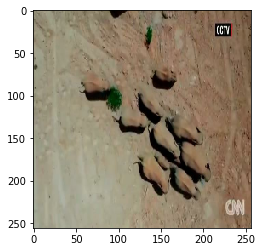

(256, 256, 3)


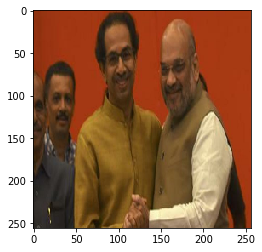

(256, 256, 3)


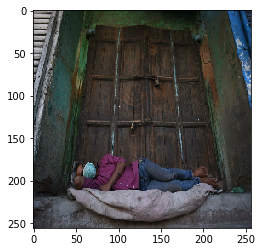

In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline 

sample_images = ''
for i in image_data_document_support_text.take(1):
  sample_images = i
sample_images = np.asarray(sample_images)

from PIL import Image 
def to_image(numpy_img):
    img = Image.fromarray(numpy_img, 'RGB')
    return img

# first three images
for image in sample_images[0:3]:
  print(image.shape)
  #image = to_image(image)
  plt.imshow(image.astype('uint8'), interpolation='nearest')
  plt.show()

#sample_images.shape

In [ ]:
from os import listdir
from os.path import isfile, join
document_Support_Text = '/content/drive/My Drive/images/document/Support_Text'
document_Support_Text = [str(f[:-4]) for f in listdir(document_Support_Text)]

document_Support_Text.sort()
print(document_Support_Text[:3])
train_df.iloc[0].document_image, train_df.iloc[10000].document_image, train_df.iloc[10009].document_image

['1', '10001', '10010']


('http://pbs.twimg.com/media/E3pFl17VEAMv8XL.jpg?format=jpg&name=large',
 'http://pbs.twimg.com/media/D7NjKAEUIAAc9iO.jpg?format=jpg&name=large',
 'http://pbs.twimg.com/media/EU8RiuBUwAAEnXC.jpg?format=jpg&name=large')

In [ ]:
img_document_entailed = image_data_document_support_multi.concatenate(image_data_document_insufficient_multi)
img_document_not_entailed = image_data_document_support_text.concatenate(image_data_document_insufficient_text)
#image_data_document_refute

img_claim_entailed = image_data_claim_support_multi.concatenate(image_data_claim_insufficient_multi)
img_claim_not_entailed = image_data_claim_support_text.concatenate(image_data_claim_insufficient_text)
#image_data_claim_refute

In [ ]:
#val
img_val_document_entailed = image_val_data_document_support_multi.concatenate(image_val_data_document_insufficient_multi)
img_val_document_not_entailed = image_val_data_document_support_text.concatenate(image_val_data_document_insufficient_text)
#image_data_document_refute

img_val_claim_entailed = image_val_data_claim_support_multi.concatenate(image_val_data_claim_insufficient_multi)
img_val_claim_not_entailed = image_val_data_claim_support_text.concatenate(image_val_data_claim_insufficient_text)
#image_data_claim_refute

In [ ]:
from pickle import dump
img_document_entailed_scaled = img_document_entailed.map(lambda x: x/255.0)
model = tf.keras.applications.Xception(include_top=False, pooling='avg')
x = []
for i in img_document_entailed_scaled:
  x.extend(model.predict(i))


In [ ]:
from pickle import dump
dump(x, open('/content/drive/My Drive/img_document_entailed_scaled_xcpetion.p', 'wb'))

In [ ]:
#val
from pickle import dump
img_val_document_entailed_scaled = img_val_document_entailed.map(lambda x: x/255.0)
model = tf.keras.applications.Xception(include_top=False, pooling='avg')
x = []
for i in img_val_document_entailed_scaled:
  x.extend(model.predict(i))
dump(x, open('/content/drive/My Drive/defactify/img_val_document_entailed_scaled_xcpetion.p', 'wb'))

In [ ]:
from pickle import dump
img_document_not_entailed_scaled = img_document_not_entailed.map(lambda x: x/255.0)
model = tf.keras.applications.Xception(include_top=False, pooling='avg')
y = []
for i in img_document_not_entailed_scaled:
  y.extend(model.predict(i))
dump(y, open('/content/drive/My Drive/img_document_not_entailed_scaled_xcpetion.p', 'wb'))

In [ ]:
#val
from pickle import dump
img_val_document_not_entailed_scaled = img_val_document_not_entailed.map(lambda x: x/255.0)
model = tf.keras.applications.Xception(include_top=False, pooling='avg')
y = []
for i in img_val_document_not_entailed_scaled:
  y.extend(model.predict(i))
dump(y, open('/content/drive/My Drive/defactify/img_val_document_not_entailed_scaled_xcpetion.p', 'wb'))

In [ ]:
from pickle import dump
img_claim_entailed_scaled = img_claim_entailed.map(lambda x: x/255.0)
model = tf.keras.applications.Xception(include_top=False, pooling='avg')
z = []
for i in img_claim_entailed_scaled:
  z.extend(model.predict(i))
dump(z, open('/content/drive/My Drive/img_claim_entailed_scaled_xcpetion.p', 'wb'))

In [ ]:
#val
from pickle import dump
img_val_claim_entailed_scaled = img_val_claim_entailed.map(lambda x: x/255.0)
model = tf.keras.applications.Xception(include_top=False, pooling='avg')
z = []
for i in img_val_claim_entailed_scaled:
  z.extend(model.predict(i))
dump(z, open('/content/drive/My Drive/defactify/img_val_claim_entailed_scaled_xcpetion.p', 'wb'))

In [ ]:
from pickle import dump
img_claim_not_entailed_scaled = img_claim_not_entailed.map(lambda x: x/255.0)
model = tf.keras.applications.Xception(include_top=False, pooling='avg')
a = []
for i in img_claim_not_entailed_scaled:
  a.extend(model.predict(i))
dump(a, open('/content/drive/My Drive/img_claim_not_entailed_scaled_xcpetion.p', 'wb'))

In [ ]:
#val
from pickle import dump
img_val_claim_not_entailed_scaled = img_val_claim_not_entailed.map(lambda x: x/255.0)
model = tf.keras.applications.Xception(include_top=False, pooling='avg')
a = []
for i in img_val_claim_not_entailed_scaled:
  a.extend(model.predict(i))
dump(a, open('/content/drive/My Drive/defactify/img_val_claim_not_entailed_scaled_xcpetion.p', 'wb'))

In [ ]:
from pickle import dump
image_data_document_refute_scaled = image_data_document_refute.map(lambda x: x/255.0)
model = tf.keras.applications.Xception(include_top=False, pooling='avg')
b = []
for i in image_data_document_refute_scaled:
  b.extend(model.predict(i))
dump(b, open('/content/drive/My Drive/image_data_document_refute_scaled_xcpetion.p', 'wb'))

In [ ]:
#val
from pickle import dump
image_val_data_document_refute_scaled = image_val_data_document_refute.map(lambda x: x/255.0)
model = tf.keras.applications.Xception(include_top=False, pooling='avg')
b = []
for i in image_val_data_document_refute_scaled:
  b.extend(model.predict(i))
dump(b, open('/content/drive/My Drive/defactify/image_val_data_document_refute_scaled_xcpetion.p', 'wb'))

In [ ]:
from pickle import dump
image_data_claim_refute_scaled = image_data_claim_refute.map(lambda x: x/255.0)
model = tf.keras.applications.Xception(include_top=False, pooling='avg')
c = []
for i in image_data_claim_refute_scaled:
  c.extend(model.predict(i))
dump(c, open('/content/drive/My Drive/image_data_claim_refute_scaled_xcpetion.p', 'wb'))

In [ ]:
#val
from pickle import dump
image_val_data_claim_refute_scaled = image_val_data_claim_refute.map(lambda x: x/255.0)
model = tf.keras.applications.Xception(include_top=False, pooling='avg')
c = []
for i in image_val_data_claim_refute_scaled:
  c.extend(model.predict(i))
dump(c, open('/content/drive/My Drive/defactify/image_val_data_claim_refute_scaled_xcpetion.p', 'wb'))

In [ ]:
from pickle import load
folder_path = '/content/drive/My Drive/'
img_document_entailed_scaled_xcpetion = load(open(folder_path+'img_document_entailed_scaled_xcpetion.p', 'rb'))
img_document_not_entailed_scaled_xcpetion = load(open(folder_path+'img_document_not_entailed_scaled_xcpetion.p', 'rb'))

img_claim_entailed_scaled_xcpetion = load(open(folder_path+'img_claim_entailed_scaled_xcpetion.p', 'rb'))
img_claim_not_entailed_scaled_xcpetion = load(open(folder_path+'img_claim_not_entailed_scaled_xcpetion.p', 'rb'))

image_data_document_refute_scaled_xcpetion = load(open(folder_path+'image_data_document_refute_scaled_xcpetion.p', 'rb'))
image_data_claim_refute_scaled_xcpetion = load(open(folder_path+'image_data_claim_refute_scaled_xcpetion.p', 'rb'))

In [ ]:
#val
from pickle import load
folder_path_val = '/content/drive/My Drive/defactify/'
img_val_document_entailed_scaled_xcpetion = load(open(folder_path_val+'img_val_document_entailed_scaled_xcpetion.p', 'rb'))
img_val_document_not_entailed_scaled_xcpetion = load(open(folder_path_val+'img_val_document_not_entailed_scaled_xcpetion.p', 'rb'))

img_val_claim_entailed_scaled_xcpetion = load(open(folder_path_val+'img_val_claim_entailed_scaled_xcpetion.p', 'rb'))
img_val_claim_not_entailed_scaled_xcpetion = load(open(folder_path_val+'img_val_claim_not_entailed_scaled_xcpetion.p', 'rb'))

image_val_data_document_refute_scaled_xcpetion = load(open(folder_path_val+'image_val_data_document_refute_scaled_xcpetion.p', 'rb'))
image_val_data_claim_refute_scaled_xcpetion = load(open(folder_path_val+'image_val_data_claim_refute_scaled_xcpetion.p', 'rb'))

In [ ]:
from scipy.spatial import distance
import numpy as np
# concatenate with cosine
def concat_np_array(a, b):
  # a: document, b: claim 
  return np.hstack((np.array(a), np.array(b)))

def concat_cosine_np_array(a, b):
  # a: document, b: claim 
  c = []
  for i, j in zip(a, b):
    c.append(distance.cosine(i, j))
  return np.hstack((np.array(a), np.array(c).reshape([len(c), -1]), np.array(b)))

entailed_scaled_xcpetion_concat = concat_cosine_np_array(img_document_entailed_scaled_xcpetion, img_claim_entailed_scaled_xcpetion)
not_entailed_scaled_xcpetion_concat = concat_cosine_np_array(img_document_not_entailed_scaled_xcpetion, img_claim_not_entailed_scaled_xcpetion)
refute_scaled_xcpetion_concat = concat_cosine_np_array(image_data_document_refute_scaled_xcpetion, image_data_claim_refute_scaled_xcpetion)

X_train = np.vstack((entailed_scaled_xcpetion_concat, not_entailed_scaled_xcpetion_concat, refute_scaled_xcpetion_concat))
y_train = np.hstack((np.ones(entailed_scaled_xcpetion_concat.shape[0])*0, np.ones(not_entailed_scaled_xcpetion_concat.shape[0])*1, np.ones(refute_scaled_xcpetion_concat.shape[0])*2))
y_train.shape

(35000,)

In [ ]:
#val
from scipy.spatial import distance
import numpy as np
# concatenate with cosine
def concat_np_array(a, b):
  # a: document, b: claim 
  return np.hstack((np.array(a), np.array(b)))

def concat_cosine_np_array(a, b):
  # a: document, b: claim 
  c = []
  for i, j in zip(a, b):
    c.append(distance.cosine(i, j))
  return np.hstack((np.array(a), np.array(c).reshape([len(c), -1]), np.array(b)))

val_entailed_scaled_xcpetion_concat = concat_cosine_np_array(img_val_document_entailed_scaled_xcpetion, img_val_claim_entailed_scaled_xcpetion)
val_not_entailed_scaled_xcpetion_concat = concat_cosine_np_array(img_val_document_not_entailed_scaled_xcpetion, img_val_claim_not_entailed_scaled_xcpetion)
val_refute_scaled_xcpetion_concat = concat_cosine_np_array(image_val_data_document_refute_scaled_xcpetion, image_val_data_claim_refute_scaled_xcpetion)

X_train_val = np.vstack((val_entailed_scaled_xcpetion_concat, val_not_entailed_scaled_xcpetion_concat, val_refute_scaled_xcpetion_concat))
y_train_val = np.hstack((np.ones(val_entailed_scaled_xcpetion_concat.shape[0])*0, np.ones(val_not_entailed_scaled_xcpetion_concat.shape[0])*1, np.ones(val_refute_scaled_xcpetion_concat.shape[0])*2))
y_train_val.shape

(7500,)

In [ ]:
from pickle import dump
dump(X_train, open('/content/drive/My Drive/defactify/image_x_train.p', 'wb'))
dump(y_train, open('/content/drive/My Drive/defactify/image_y_train.p', 'wb'))

In [ ]:
from pickle import dump
dump(X_train_val, open('/content/drive/My Drive/defactify/image_x_train_val.p', 'wb'))
dump(y_train_val, open('/content/drive/My Drive/defactify/image_y_train_val.p', 'wb'))

In [ ]:
# create random indices to shuffle train data
len_xtrain = 35000
BATCH_SIZE = 32
random_indices = np.arange(0, len_xtrain)
np.random.shuffle(random_indices)
X_train_shuffle = X_train[random_indices]
y_train_shuffle = tf.keras.utils.to_categorical(y_train[random_indices], num_classes=3)

In [ ]:
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras import Sequential
tf.random.set_seed(343)

'''
model = Sequential()
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(3, activation='sigmoid'))
'''

#0.9139 for 5000->Dropout(0.5)->3

model = Sequential()
model.add(Dense(5000, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(3, activation='sigmoid'))


NameError: ignored

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001, clipvalue=1.0), loss=tf.nn.softmax_cross_entropy_with_logits(), metrics=['acc'])
model.fit(X_train_shuffle, y_train_shuffle, batch_size=BATCH_SIZE, epochs=20, verbose=1)

In [ ]:
model.summary()
model.save('/content/drive/My Drive/IMG_MODEL/model_img_train')

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 5000)              20490000  
                                                                 
 dropout_14 (Dropout)        (None, 5000)              0         
                                                                 
 dense_24 (Dense)            (None, 3)                 15003     
                                                                 
Total params: 20,505,003
Trainable params: 20,505,003
Non-trainable params: 0
_________________________________________________________________
INFO:tensorflow:Assets written to: /content/drive/My Drive/IMG_MODEL/model_img_train/assets


In [ ]:
# entailed (0), not_entailed (1), refute (2)
model_predictions_train = model.predict(X_train)

In [ ]:
model_predictions_train_argmax = model_predictions_train.argmax(axis=-1)
model_predictions_train_argmax = model_predictions_train_argmax[random_indices]
argmax_map = {0:'entailed', 1:'not_entailed', 2:'refute'}
predictions = [argmax_map[i] for i in model_predictions_train_argmax]

In [ ]:
category_map = {'Support_Multimodal':'entailed', 'Insufficient_Multimodal':'entailed', 'Support_Text':'not_entailed', 'Insufficient_Text':'not_entailed', 'Refute':'refute'}
train_df_Support_Multimodal = train_df[train_df.Category=='Support_Multimodal']
train_df_Insufficient_Multimodal = train_df[train_df.Category=='Insufficient_Multimodal']
train_df_Support_Text = train_df[train_df.Category=='Support_Text']
train_df_Insufficient_Text = train_df[train_df.Category=='Insufficient_Text']
train_df_Refute = train_df[train_df.Category=='Refute']


In [ ]:
train_df_Support_Multimodal = list(train_df_Support_Multimodal.index)
train_df_Insufficient_Multimodal = list(train_df_Insufficient_Multimodal.index)
train_df_Support_Text = list(train_df_Support_Text.index)
train_df_Insufficient_Text = list(train_df_Insufficient_Text.index)
train_df_Refute = list(train_df_Refute.index)

In [ ]:
def sorted_index(df_indices):
  return sorted([str(i) for i in df_indices])

train_df_Support_Multimodal_sorted = sorted_index(train_df_Support_Multimodal)
train_df_Insufficient_Multimodal_sorted = sorted_index(train_df_Insufficient_Multimodal)
train_df_Support_Text_sorted = sorted_index(train_df_Support_Text)
train_df_Insufficient_Text_sorted = sorted_index(train_df_Insufficient_Text)
train_df_Refute_sorted = sorted_index(train_df_Refute)

entailed = train_df_Support_Multimodal_sorted + train_df_Insufficient_Multimodal_sorted
not_entailed = train_df_Support_Text_sorted + train_df_Insufficient_Text_sorted
refute = train_df_Refute_sorted


In [ ]:
import pandas as pd
download_path = download_path
train_df = pd.read_csv(download_path + "train.csv", index_col="Id")
print(len(train_df))
val_df = pd.read_csv(download_path + "val.csv", index_col="Id")
print(len(val_df))
test_df = pd.read_csv(download_path + "test.csv", index_col="Id")
print(len(test_df))

35000
7500
7500


In [ ]:
print(train_df.columns)
print(val_df.columns)
print(test_df.columns)

train_df_claim = list(train_df.claim)
train_df_document = list(train_df.document)

val_df_claim = list(val_df.claim)
val_df_document = list(val_df.document)

test_df_claim = list(test_df.claim)
test_df_document = list(test_df.document)




Index(['claim_image', 'claim', 'claim_ocr', 'document_image', 'document',
       'document_ocr', 'Category'],
      dtype='object')
Index(['claim_image', 'claim', 'claim_ocr', 'document_image', 'document',
       'document_ocr', 'Category'],
      dtype='object')
Index(['claim_image', 'claim', 'claim_ocr', 'document_image', 'document',
       'document_ocr'],
      dtype='object')


In [ ]:
!pip install tweet-preprocessor
!pip install ekphrasis

     |████████████████████████████████| 80 kB 3.4 MB/s 
     |████████████████████████████████| 43 kB 2.3 MB/s 
     |████████████████████████████████| 64 kB 3.0 MB/s 
  Created wheel for ekphrasis: filename=ekphrasis-0.5.1-py3-none-any.whl size=82842 sha256=3c72dd264de6cfebf38c2e931978bef60e046f969b7ee8f9af46d3e3b7e7bfdf
  Stored in directory: /root/.cache/pip/wheels/f7/ec/0d/12659e32faf780546945d0120f2c8410eb3efb7426731da88f
  Created wheel for ftfy: filename=ftfy-6.0.3-py3-none-any.whl size=41933 sha256=935bb8f3b7817a7ea50db8f63a6279e38f46eb4298bd599ea6642e4d6d7f5167
  Stored in directory: /root/.cache/pip/wheels/19/f5/38/273eb3b5e76dfd850619312f693716ac4518b498f5ffb6f56d
Successfully built ekphrasis ftfy


In [ ]:
import re
import nltk
from nltk import word_tokenize, FreqDist
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.tokenize import TweetTokenizer
import preprocessor as p
import string
from nltk.stem import WordNetLemmatizer 
nltk.download('punkt')

lemmatizer = WordNetLemmatizer()
p.set_options(p.OPT.EMOJI, p.OPT.NUMBER)
stop_words = [
        "a", "about", "above", "across", "after", "afterwards", "again", "against", "all", "almost", "alone", "along",
        "already", "also", "although", "always", "am", "among", "amongst", "amoungst", "amount", "an", "and", "another",
        "any", "anyhow", "anyone", "anything", "anyway", "anywhere", "are", "around", "as", "at", "back", "be",
        "became", "because", "become", "becomes", "becoming", "been", "before", "beforehand", "behind", "being",
        "below", "beside", "besides", "between", "beyond", "bill", "both", "bottom", "but", "by", "call", "can", "co",
        "con", "could", "cry", "de", "describe", "detail", "do", "done", "down", "due", "during", "each", "eg", "eight",
        "either", "eleven", "else", "elsewhere", "empty", "enough", "etc", "even", "ever", "every", "everyone",
        "everything", "everywhere", "except", "few", "fifteen", "fifty", "fill", "find", "fire", "first", "five", "for",
        "former", "formerly", "forty", "found", "four", "from", "front", "full", "further", "get", "give", "go", "had",
        "has", "have", "he", "hence", "her", "here", "hereafter", "hereby", "herein", "hereupon", "hers", "herself",
        "him", "himself", "his", "how", "however", "hundred", "i", "ie", "if", "in", "inc", "indeed", "interest",
        "into", "is", "it", "its", "itself", "keep", "last", "latter", "latterly", "least", "less", "ltd", "made",
        "many", "may", "me", "meanwhile", "might", "mill", "mine", "more", "moreover", "most", "mostly", "move", "much",
        "must", "my", "myself", "name", "namely", "neither", "nevertheless", "next", "nine", "nobody", "now", "nowhere",
        "of", "off", "often", "on", "once", "one", "only", "onto", "or", "other", "others", "otherwise", "our", "ours",
        "ourselves", "out", "over", "own", "part", "per", "perhaps", "please", "put", "rather", "re", "same", "see",
        "serious", "several", "she", "should", "show", "side", "since", "sincere", "six", "sixty", "so", "some",
        "somehow", "someone", "something", "sometime", "sometimes", "somewhere", "still", "such", "system", "take",
        "ten", "than", "that", "the", "their", "them", "themselves", "then", "thence", "there", "thereafter", "thereby",
        "therefore", "therein", "thereupon", "these", "they", "thick", "thin", "third", "this", "those", "though",
        "three", "through", "throughout", "thru", "thus", "to", "together", "too", "top", "toward", "towards", "twelve",
        "twenty", "two", "un", "under", "until", "up", "upon", "us", "very", "via", "was", "we", "well", "were", "what",
        "whatever", "when", "whence", "whenever", "where", "whereafter", "whereas", "whereby", "wherein", "whereupon",
        "wherever", "whether", "which", "while", "whither", "who", "whoever", "whole", "whom", "whose", "why", "will",
        "with", "within", "without", "would", "yet", "you", "your", "yours", "yourself", "yourselves"
        ]
#stopwords.words('english')
stop = set(stop_words)
#moby_tokens = nltk.word_tokenize(moby_raw)
nltk_tt = nltk.TweetTokenizer()
punctuations = set(string.punctuation)
punctuations.add('’')
punctuations.add('‘')
punctuations.add('“')
punctuations.add('”')
for i in ['aren',"aren't",'couldn',"couldn't",'didn',"didn't",'doesn',"doesn't",'hadn',"hadn't",'hasn',"hasn't",'isn',"isn't",'shouldn',"shouldn't",'wasn',"wasn't",'weren',"weren't","won't",'won','wouldn',"wouldn't"]:
  stop.discard(i)
def preprocess_text(text_list, tokenized_processed=[]):
  links_removed = [re.sub(r'http\S+', '', i, flags=re.DOTALL) for i in text_list]
  return_removed =  [i.replace('\n','') for i in links_removed]
  #return [p.tokenize(i) for i in return_removed]
  tokenized = [nltk_tt.tokenize(i) for i in return_removed]
  for sentence in tokenized:
    tokenized_processed.append(' '.join([lemmatizer.lemmatize(i) for i in sentence if not (i in stop or i in punctuations)]).lower())


'''
training_data = train_df_claim + val_df_claim + train_df_document + val_df_document
test_data = test_df_claim + test_df_document

train_df_claim
'''
#train_claim_data_preprocessing
tokenized_processed_train_df_claim = []
preprocess_text(train_df_claim, tokenized_processed_train_df_claim)
final_train_claims = [p.tokenize(i) for i in tokenized_processed_train_df_claim]
final_train_claims

tokenized_processed_val_df_claim = []
preprocess_text(val_df_claim, tokenized_processed_val_df_claim)
final_val_claims = [p.tokenize(i) for i in tokenized_processed_val_df_claim]
final_val_claims

tokenized_processed_train_df_document = []
preprocess_text(train_df_document, tokenized_processed_train_df_document)
final_train_docs = [p.tokenize(i) for i in tokenized_processed_train_df_document]
final_train_docs

tokenized_processed_val_df_document = []
preprocess_text(val_df_document, tokenized_processed_val_df_document)
final_val_docs = [p.tokenize(i) for i in tokenized_processed_val_df_document]
final_val_docs

tokenized_processed_test_df_claim = []
preprocess_text(test_df_claim, tokenized_processed_test_df_claim)
final_test_claims = [p.tokenize(i) for i in tokenized_processed_test_df_claim]
final_test_claims

tokenized_processed_test_df_document = []
preprocess_text(test_df_document, tokenized_processed_test_df_document)
final_test_docs = [p.tokenize(i) for i in tokenized_processed_test_df_document]
final_test_docs


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['indian council medical research icmr director general balram bhargava credited india s pre-emptive proactive step relatively lesser number coronavirus covid $NUMBER$ case country he spoke rhythma kaul step issue like community transmission edited excerpt what reason relatively low case many speculate number not true people speculate want fact india managed number low pre-emptive proactive step since positive case travel related effective close international border early stage outbreak we started screening passenger airport january $NUMBER$ world health organisation who declared outbreak public health emergency international concern january $NUMBER$ our contact tracing protocol effective $NUMBER$ people community surveillance all measure worked why not testing some say not test not know magnitude problem . . . we testing single person need tested there testing protocol place high-level expert committee chaired director all india institute medical sciences delhi dr randeep guleria the 

In [ ]:
MAX_FEATURES = 5000

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
tf_vector = TfidfVectorizer(max_features=MAX_FEATURES, use_idf=False)
tf_vector_train_fit = tf_vector.fit(final_train_claims + final_val_claims + final_train_docs + final_val_docs)

tfidf_vector = TfidfVectorizer(max_features=MAX_FEATURES)
tfidf_vector_train_test_fit = tfidf_vector.fit(final_train_claims + final_val_claims + final_train_docs + final_val_docs + final_test_claims + final_test_docs)

In [ ]:
tf_vector_train_claims = tf_vector_train_fit.transform(final_train_claims)
tf_vector_val_claims = tf_vector_train_fit.transform(final_val_claims)
tf_vector_train_docs = tf_vector_train_fit.transform(final_train_docs)
tf_vector_val_docs = tf_vector_train_fit.transform(final_val_docs)
tf_vector_test_docs = tf_vector_train_fit.transform(final_test_docs)
tf_vector_test_claims = tf_vector_train_fit.transform(final_test_claims)

In [ ]:
tfidf_vector_train_claims = tfidf_vector_train_test_fit.transform(final_train_claims)
tfidf_vector_val_claims = tfidf_vector_train_test_fit.transform(final_val_claims)
tfidf_vector_train_docs = tfidf_vector_train_test_fit.transform(final_train_docs)
tfidf_vector_val_docs = tfidf_vector_train_test_fit.transform(final_val_docs)
tfidf_vector_test_docs = tfidf_vector_train_test_fit.transform(final_test_docs)
tfidf_vector_test_claims = tfidf_vector_train_test_fit.transform(final_test_claims)

In [ ]:
#prepare Xtrain
def concat_cosine_np_array_tfidf(tf_a, tf_b, tfidf_a, tfidf_b):
  # a: document, b: claim 
  c = []
  for i, j in zip(tfidf_a, tfidf_b):
    c.append(distance.cosine(i, j))
  return np.hstack((tf_a, np.array(c).reshape([len(c), -1]), tf_b))

tfidf_train_val_claim = np.vstack((tfidf_vector_train_claims.toarray(), tfidf_vector_val_claims.toarray()))
tfidf_train_val_docs = np.vstack((tfidf_vector_train_docs.toarray(), tfidf_vector_val_docs.toarray()))

tf_train_val_claim = np.vstack((tf_vector_train_claims.toarray(), tf_vector_val_claims.toarray()))
tf_train_val_docs = np.vstack((tf_vector_train_docs.toarray(), tf_vector_val_docs.toarray()))

concat_cosine_train_val = concat_cosine_np_array_tfidf(tf_train_val_docs, tf_train_val_claim, tfidf_train_val_docs, tfidf_train_val_claim)

/usr/local/lib/python3.7/dist-packages/scipy/spatial/distance.py:720: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


In [ ]:
y_train = list(list(train_df.Category) + list(val_df.Category))
map_category_text = {'Support_Multimodal':0, 'Support_Text':0, 'Insufficient_Multimodal':1, 'Insufficient_Text':1, 'Refute':2} 
y_train = [map_category_text[i] for i in y_train]

In [ ]:
y_train_categorical = tf.keras.utils.to_categorical(np.array(y_train))

In [ ]:
sum(concat_cosine_train_val[5]==0), len(concat_cosine_train_val[0]), concat_cosine_train_val.shape, y_train_categorical.shape

(9794, 10001, (42500, 10001), (42500, 3))

In [ ]:
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras import Sequential
tf.random.set_seed(343)

'''
model = Sequential()
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(3, activation='sigmoid'))
'''

#0.9139 for 5000->Dropout(0.5)->3

model_text = Sequential()
model_text.add(Dense(5000, activation='relu'))
model_text.add(Dropout(0.5))

model_text.add(Dense(3, activation='sigmoid'))


In [ ]:
model_text.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss=tf.nn.softmax_cross_entropy_with_logits, metrics=['acc'])
model_text.fit(concat_cosine_train_val, y_train_categorical, batch_size=BATCH_SIZE, epochs=5, verbose=1)


Epoch 1/5
1329/1329 [==============================] - 121s 91ms/step - loss: nan - acc: 0.4011
Epoch 2/5
  68/1329 [>.............................] - ETA: 1:55 - loss: nan - acc: 0.4145

KeyboardInterrupt: ignored

#Submission

In [ ]:
val_df = pd.read_csv(download_path + "val.csv", index_col="Id")
val_df.head()

claim_image  ...            Category
Id                                                     ...                    
1   http://pbs.twimg.com/media/Dyosj8rX4AEVHHb.jpg...  ...  Support_Multimodal
2   http://pbs.twimg.com/media/EAKqO0KU4AET4E3.png...  ...  Support_Multimodal
3   https://factly.in/wp-content/uploads//2021/05/...  ...              Refute
4   https://images.thequint.com/thequint%2F2020-03...  ...              Refute
5   http://pbs.twimg.com/media/D31hnNaUIAEhhoc.jpg...  ...        Support_Text

[5 rows x 7 columns]

In [ ]:
image_directory_val = "images_val"
if not os.path.isdir(image_directory_val):
  os.makedirs(image_directory_val)
for i in ["claim", "document"]:
  if not os.path.isdir(image_directory_val + "/" + i):
    os.makedirs(image_directory_val + "/" + i)

In [ ]:
for n, row in val_df.iterrows():
  if n<238:
    continue
  headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'}
  response = requests.get(row["claim_image"], headers=headers)
  img = Image.open(io.BytesIO(response.content))
  img = img.convert('RGB')
  img.save(image_directory_val + "/claim/" + str(n) + ".jpg")

  response = requests.get(row["document_image"], headers=headers)
  img = Image.open(io.BytesIO(response.content))
  img = img.convert('RGB')
  img.save(image_directory_val + "/document/" + str(n) + ".jpg")

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [ ]:
n

238

In [ ]:
# Validation data prediction using trained model
download_path = '/content/'
train_df = pd.read_csv(download_path + "train.csv", index_col="Id")
val_df = pd.read_csv(download_path + "val.csv", index_col="Id")
test_df = pd.read_csv(download_path + "test.csv")
test_category_df = pd.read_csv(download_path + "goldlabels_test.csv")
test_df = pd.merge(test_df, test_category_df).drop('Id', axis=1)

train_df_claim = list(train_df.claim)
train_df_document = list(train_df.document)

val_df_claim = list(val_df.claim)
val_df_document = list(val_df.document)

test_df_claim = list(test_df.claim)
test_df_document = list(test_df.document)

In [ ]:
!pip install transformers

In [ ]:
train_df_claim[0]

'China’s famed wandering elephants are on the move again, heading southwest while a male who broke from the herd is still keeping his distance. https://t.co/o5j7PDDveJ'

In [ ]:
!pip install -U sentence-transformers


In [ ]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-MiniLM-L6-v2')


Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
import preprocessor as p
p.set_options(p.OPT.URL)
train_df_claim = [p.clean(i) for i in train_df_claim]

In [ ]:
train_claim_sentence_embeddings = model.encode(train_df_claim)

In [ ]:

train_df_document = [p.clean(i) for i in train_df_document]

train_document_sentence_embeddings = model.encode(train_df_document)

In [ ]:
val_df_claim = [p.clean(i) for i in val_df_claim]
val_claim_sentence_embeddings = model.encode(val_df_claim)

In [ ]:
val_df_document = [p.clean(i) for i in val_df_document]
val_document_sentence_embeddings = model.encode(val_df_document)

In [ ]:
dump(train_claim_sentence_embeddings, open('/content/drive/My Drive/defactify/train_claim_sentence_embeddings.p', 'wb'))
dump(train_document_sentence_embeddings, open('/content/drive/My Drive/defactify/train_document_sentence_embeddings.p', 'wb'))

dump(val_claim_sentence_embeddings, open('/content/drive/My Drive/defactify/val_claim_sentence_embeddings.p', 'wb'))
dump(val_document_sentence_embeddings, open('/content/drive/My Drive/defactify/val_document_sentence_embeddings.p', 'wb'))

In [ ]:
test_df_claim = [p.clean(i) for i in test_df_claim]
test_claim_sentence_embeddings = model.encode(test_df_claim)

In [ ]:
test_df_document = [p.clean(i) for i in test_df_document]
test_document_sentence_embeddings = model.encode(test_df_document)

In [ ]:
dump(test_claim_sentence_embeddings, open('/content/drive/My Drive/defactify/test_claim_sentence_embeddings.p', 'wb'))
dump(test_document_sentence_embeddings, open('/content/drive/My Drive/defactify/test_document_sentence_embeddings.p', 'wb'))

In [ ]:
#val_claim_sentence_embeddings = load(open('/content/drive/My Drive/val_claim_sentence_embeddings.p', 'rb'))
#val_document_sentence_embeddings = load(open('/content/drive/My Drive/val_document_sentence_embeddings.p', 'wb'))

In [ ]:
from scipy.spatial import distance
def concat_cosine_np_array(a, b):
  # a: document, b: claim 
  c = []
  for i, j in zip(a, b):
    c.append(distance.cosine(i, j))
  return np.hstack((np.array(a), np.array(c).reshape([len(c), -1]), np.array(b)))

X_train = concat_cosine_np_array(train_claim_sentence_embeddings, train_document_sentence_embeddings)
X_val = concat_cosine_np_array(val_claim_sentence_embeddings, val_document_sentence_embeddings)

In [ ]:
X_test_text = concat_cosine_np_array(test_claim_sentence_embeddings, test_document_sentence_embeddings)

In [ ]:
X_test_text.shape

(7500, 769)

In [ ]:
X_train_val = np.vstack((X_train, X_val))

In [ ]:
y_train = list(train_df.Category) 
y_val = list(val_df.Category)
y_test = list(test_df.Category)

map_category_text = {'Support_Multimodal':0, 'Support_Text':0, 'Insufficient_Multimodal':1, 'Insufficient_Text':1, 'Refute':2} 
y_train = [map_category_text[i] for i in y_train]
y_val = [map_category_text[i] for i in y_val]
y_test = [map_category_text[i] for i in y_test]
#y_train_val = [map_category_text[i] for i in y_train_val]

In [ ]:
dump(X_train, open('/content/drive/My Drive/defactify/x_train_text.p', 'wb'))
dump(X_val, open('/content/drive/My Drive/defactify/x_val_text.p', 'wb'))
dump(X_test_text, open('/content/drive/My Drive/defactify/x_test_text.p', 'wb'))

dump(y_train, open('/content/drive/My Drive/defactify/y_train_text.p', 'wb'))
dump(y_val, open('/content/drive/My Drive/defactify/y_val_text.p', 'wb'))
dump(y_test, open('/content/drive/My Drive/defactify/y_test_text.p', 'wb'))

In [ ]:
y_train_categorical = tf.keras.utils.to_categorical(np.array(y_train))
y_val_categorical = tf.keras.utils.to_categorical(np.array(y_val))

In [ ]:
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras import Sequential
tf.random.set_seed(343)

'''
model = Sequential()
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(3, activation='sigmoid'))
'''

#0.9139 for 5000->Dropout(0.5)->3

model_text = Sequential()
model_text.add(Dense(800, activation=tf.nn.relu, activity_regularizer = tf.keras.regularizers.L2(0.0001)))
model_text.add(Dropout(0.7))
#model_text.add(Dense(500, activation=tf.nn.leaky_relu, activity_regularizer = tf.keras.regularizers.L2(0.004)))
#model_text.add(Dropout(0.40))
#model_text.add(Dense(600, activation='relu', kernel_regularizer='l2'))
#model_text.add(Dropout(0.5))
#model_text.add(Dense(600, activation='relu', kernel_regularizer='l2'))
#model_text.add(Dropout(0.5))

model_text.add(Dense(3, activation='sigmoid'))


In [ ]:
BATCH_SIZE = 32
model_text.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss=tf.nn.softmax_cross_entropy_with_logits, metrics=['acc'])
model_text.fit(X_train, y_train_categorical, batch_size=BATCH_SIZE, epochs=50, verbose=1, validation_data=(X_val, y_val_categorical))


Epoch 1/50
1094/1094 [==============================] - 8s 7ms/step - loss: 0.7998 - acc: 0.7310 - val_loss: 0.7530 - val_acc: 0.7833
Epoch 2/50
1094/1094 [==============================] - 7s 7ms/step - loss: 0.7438 - acc: 0.7870 - val_loss: 0.7353 - val_acc: 0.7968
Epoch 3/50
1094/1094 [==============================] - 7s 7ms/step - loss: 0.7293 - acc: 0.8012 - val_loss: 0.7293 - val_acc: 0.8083
Epoch 4/50
1094/1094 [==============================] - 8s 7ms/step - loss: 0.7200 - acc: 0.8120 - val_loss: 0.7254 - val_acc: 0.8016
Epoch 5/50
1094/1094 [==============================] - 7s 7ms/step - loss: 0.7134 - acc: 0.8211 - val_loss: 0.7223 - val_acc: 0.8125
Epoch 6/50
1094/1094 [==============================] - 8s 7ms/step - loss: 0.7069 - acc: 0.8284 - val_loss: 0.7174 - val_acc: 0.8140
Epoch 7/50
1094/1094 [==============================] - 7s 7ms/step - loss: 0.7024 - acc: 0.8323 - val_loss: 0.7135 - val_acc: 0.8193
Epoch 8/50
1094/1094 [==============================] - 7s 7ms

In [ ]:
model_text.save('/content/drive/My Drive/model_text')

INFO:tensorflow:Assets written to: /content/drive/My Drive/model_text/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/model_text/assets


In [ ]:
text_predictions = model_text.predict(X_test_text).argmax(-1)

In [ ]:
from pickle import dump, load
dump(text_predictions, open('/content/drive/My Drive/text_predictions.p', 'wb'))

In [ ]:
map_filename_result_img = load(open('/content/drive/My Drive/map_filename_result.p', 'rb'))

In [ ]:
len(map_filename_result_img), len(text_predictions)

(7500, 7500)

In [ ]:
final_predictions = []
for idx, i in enumerate(text_predictions):
  final_predictions.append(str(i)+str(map_filename_result_img[str(idx+1)]))
#text_prediction + image_prediction

In [ ]:
set(final_predictions)
#{'Support_Multimodal':0, 'Support_Text':0, 'Insufficient_Multimodal':1, 'Insufficient_Text':1, 'Refute':2} 
# 00 -> text_entailed, image_entailed -> Support_Multimodal
# 01 -> text_entailed, image_not_entailed -> Support_Text
# 10 -> text_not_entailed, image_entailed -> Insufficient_Multimodal
# 11 -> text_not_entailed, image_not_entailed -> Insufficient_Text
# 22 -> fake_text, fake_image -> Refute

# 02 -> 01 -> Support_Text
# 12 -> 22 -> Refute
# 21 -> 22 -> Refute
# 20 -> 10 -> Insufficient_Multimodal
from collections import Counter
c = Counter(final_predictions)


In [ ]:
set(final_predictions)

{'00', '01', '02', '10', '11', '12', '20', '21', '22'}

In [ ]:
c.keys(), c['22'], c['20'], c['02'], c['12'], c['21']
                     #10      #01     #11      #11

(dict_keys(['10', '00', '11', '22', '01', '20', '21', '12', '02']),
 1368,
 38,
 50,
 62,
 90)

In [ ]:
c.update()

In [ ]:
#{'Support_Multimodal':0, 'Support_Text':0, 'Insufficient_Multimodal':1, 'Insufficient_Text':1, 'Refute':2} 
# 00 -> text_entailed, image_entailed -> Support_Multimodal
# 01 -> text_entailed, image_not_entailed -> Support_Text
# 10 -> text_not_entailed, image_entailed -> Insufficient_Multimodal
# 11 -> text_not_entailed, image_not_entailed -> Insufficient_Text
# 22 -> fake_text, fake_image -> Refute

# 02 -> 01 -> Support_Text
# 12 -> 22 -> Refute
# 21 -> 22 -> Refute
# 20 -> 10 -> Insufficient_Multimodal
map_final_predictions = {'00':'Support_Multimodal', '01':'Support_Text', '10':'Insufficient_Multimodal', '11':'Insufficient_Text', '22':'Refute', \
                         '02':'Support_Text', '12':'Refute', '21':'Refute', '20':'Insufficient_Multimodal'}

In [ ]:
final_consolidated_predictions = [map_final_predictions[i] for i in final_predictions]

In [ ]:
dump(final_consolidated_predictions, open('/content/drive/My Drive/final_consolidated_predictions.p', 'wb'))

In [ ]:
len(final_consolidated_predictions)

7500

In [ ]:
df_predictions = pd.DataFrame({'Id':list(np.arange(1, len(final_consolidated_predictions)+1)), 'Category':final_consolidated_predictions})
df_predictions.to_csv('/content/drive/My Drive/submission.csv', index=False)

In [ ]:
from pickle import load, dump
dump(train_claim_sentence_embeddings, open('/content/drive/My Drive/train_claim_sentence_embeddings.p', 'wb'))
dump(train_document_sentence_embeddings, open('/content/drive/My Drive/train_document_sentence_embeddings.p', 'wb'))
train_claim_sentence_embeddings.shape, train_document_sentence_embeddings.shape

((35000, 384), (35000, 384))

In [ ]:
model_text(X_train)

In [ ]:
# Assuming predictions are stored in a list
predictions = []
answer = pd.DataFrame(predictions, columns =['Category'])

In [ ]:
answer.to_csv("answer.csv")
!zip answer.zip answer.csv

Upload zip file to codalab